In [1]:
%run StatTest2_WithSimulation_Setup.ipynb

{0: ['ME', 'IL', 'PA', 'GA', 'OK', 'DE', 'WA', 'CT', 'OH', 'VA', 'NE', 'MT', 'IN', 'CA', 'HI', 'ND', 'MD', 'SC', 'RI', 'AK', 'KY', 'WI', 'LA', 'MN', 'MS', 'WV', 'FL'], 1: ['SD', 'IL', 'PA', 'NH', 'NM', 'NV', 'OK', 'UT', 'CT', 'OH', 'VA', 'OR', 'CO', 'IN', 'HI', 'AL', 'RI', 'AK', 'LA', 'MN', 'IA', 'AR', 'WV'], 2: ['MI', 'ME', 'WY', 'DC', 'TX', 'AZ', 'NC', 'WA', 'OR', 'CO', 'MT', 'ND', 'TN', 'SC', 'AL', 'NY', 'KY', 'NJ', 'KS', 'ID', 'IA', 'AR', 'MO'], 3: ['MI', 'SD', 'WY', 'NH', 'DC', 'TX', 'GA', 'AZ', 'NM', 'NC', 'NV', 'DE', 'UT', 'NE', 'CA', 'MD', 'TN', 'NY', 'NJ', 'KS', 'WI', 'ID', 'MS', 'FL', 'MO']}
{0: ['MI', 'SD', 'WY', 'NH', 'DC', 'TX', 'AZ', 'NM', 'NC', 'NV', 'UT', 'OR', 'CO', 'TN', 'AL', 'NY', 'NJ', 'KS', 'ID', 'IA', 'AR', 'MO'], 1: ['MI', 'ME', 'WY', 'DC', 'TX', 'GA', 'AZ', 'NC', 'DE', 'WA', 'NE', 'MT', 'CA', 'ND', 'MD', 'TN', 'SC', 'NY', 'KY', 'NJ', 'KS', 'WI', 'ID', 'MS', 'FL', 'MO'], 2: ['SD', 'IL', 'PA', 'NH', 'GA', 'NM', 'NV', 'OK', 'DE', 'UT', 'CT', 'OH', 'VA', 'NE', 'IN'

In [2]:
data2014 = pd.read_csv("Our_Dataset/2014dataset.csv")
data2015 = pd.read_csv("Our_Dataset/2015dataset.csv")
data2016 = pd.read_csv("Our_Dataset/2016dataset.csv")
data2017 = pd.read_csv("Our_Dataset/2017dataset.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,52,323,649,882,932,1092,1202) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,57,204,341,376,377,396,430,431,928,944,1006,1013,1151,1160,1169,1179,1411) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,17,163,355,406,702,835,847,1083,1156,1183,1185,1200) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Create the labels.
# By index:
# label 2 is transfers
# label 3 is premiums
# label 4 is costs
# label 5 is member months
# label 6 is reinsurance (individual group only)

ind_labels_14 = ["HIOS ID", "HIOS INPUTTED INSURANCE COMPANY NAME",
                  "HHS RISK ADJUSTMENT TRANSFER AMOUNT (INDIVIDUAL MARKET, INCLUDING CATASTROPHIC)",
                  "1.1Directpremiumwritten2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "2.16Totalincurredclaims2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "7.4Membermonths2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "STATE", "REINSURANCE PAYMENT AMOUNT (OR NOT ELIGIBLE)"] # no more reinsurance as of 2017
ind_labels_15 = [label.replace('15', '16') for label in ind_labels_14]
ind_labels_16 = [label.replace('15', '17') for label in ind_labels_14]
ind_labels_17 = [label.replace('15', '18') for label in ind_labels_14][:-1]

sg_labels_14 = ["HIOS ID", "HIOS INPUTTED INSURANCE COMPANY NAME",
                 "HHS RISK ADJUSTMENT TRANSFERS AMOUNT (SMALL GROUP MARKET)",
                  "1.1Directpremiumwritten7HealthInsuranceSMALLGROUPTotalasof3/31/15",
                  "2.16Totalincurredclaims7HealthInsuranceSMALLGROUPTotalasof3/31/15",
                  "7.4Membermonths7HealthInsuranceSMALLGROUPTotalasof3/31/15", "STATE"]
sg_labels_15 = [label.replace('15', '16') for label in sg_labels_14]
sg_labels_16 = [label.replace('15', '17') for label in sg_labels_14]
sg_labels_17 = [label.replace('15', '18') for label in sg_labels_14]

In [4]:
# Filter the data to include only the fields we want

ind_data_14 = data2014[ind_labels_14].dropna()
ind_data_15 = data2015[ind_labels_15].dropna()
ind_data_16 = data2016[ind_labels_16].dropna()
ind_data_17 = data2017[ind_labels_17].dropna()
sg_data_14 = data2014[sg_labels_14].dropna()
sg_data_15 = data2015[sg_labels_15].dropna()
sg_data_16 = data2016[sg_labels_16].dropna()
sg_data_17 = data2017[sg_labels_17].dropna()

In [5]:
# Drop companies with <2000 MM
ind_data_14 = ind_data_14.where(ind_data_14[ind_labels_14[5]] > 2000).dropna()
ind_data_15 = ind_data_15.where(ind_data_15[ind_labels_15[5]] > 2000).dropna()
ind_data_16 = ind_data_16.where(ind_data_16[ind_labels_16[5]] > 2000).dropna()
ind_data_17 = ind_data_17.where(ind_data_17[ind_labels_17[5]] > 2000).dropna()
sg_data_14 = sg_data_14.where(sg_data_14[sg_labels_14[5]] > 2000).dropna()
sg_data_15 = sg_data_15.where(sg_data_15[sg_labels_15[5]] > 2000).dropna()
sg_data_16 = sg_data_16.where(sg_data_16[sg_labels_16[5]] > 2000).dropna()
sg_data_17 = sg_data_17.where(sg_data_17[sg_labels_17[5]] > 2000).dropna()

In [6]:
# Calculate transfers, premiums, costs, and reinsurance (if individual group) per member month
def calculate_pmm(df, df_labels, group):
    df["MM"] = df[df_labels[5]]
    df["Transfers"] = df[df_labels[2]]
    df["TotalCosts"] = abs(df[df_labels[4]])
    df["Enrollees"] = df["MM"] / 12
    df["TransfersPerEnrollee"] = df["Transfers"] / df["Enrollees"]
    df["TransfersPerSqrtEnrollee"] = df["Transfers"] / np.sqrt(df["Enrollees"])
    df["LogEnrollees"] = np.log(df["Enrollees"])
    df["LogTransfers"] = np.log(df["Transfers"]**2 + 1)
    df["TransfersPMM"] = df[df_labels[2]] / df[df_labels[5]]
    df["PremiumsPMM"] = abs(df[df_labels[3]] / df[df_labels[5]])
    df["CostsPMM"] = abs(df[df_labels[4]] / df[df_labels[5]])
    if group == "i":
        df["ReinsurancePMM"] = df[df_labels[7]] / df[df_labels[5]]
        df["ProfitsPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"] + df["ReinsurancePMM"]
        #df["PremMinusCostsPlusReinsurancePMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["ReinsurancePMM"]
    elif group == "sg":
        df["ProfitsPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"]
    df["PremMinusCostsPMM"] = df["PremiumsPMM"] - df["CostsPMM"]
    df["PremMinusCostsPlusTransfersPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"]
    df["SicknessPMM"] = df["CostsPMM"] - df["PremiumsPMM"]
    average_sickness = np.mean(df["SicknessPMM"])
    df["ExcessSicknessPMM"] = df["SicknessPMM"] - average_sickness
    return df

ind_data_14 = calculate_pmm(ind_data_14, ind_labels_14, "i")
ind_data_15 = calculate_pmm(ind_data_15, ind_labels_15, "i")
ind_data_16 = calculate_pmm(ind_data_16, ind_labels_16, "i")
ind_data_17 = calculate_pmm(ind_data_17, ind_labels_17, "sg")
sg_data_14 = calculate_pmm(sg_data_14, sg_labels_14, "sg")
sg_data_15 = calculate_pmm(sg_data_15, sg_labels_15, "sg")
sg_data_16 = calculate_pmm(sg_data_16, sg_labels_16, "sg")
sg_data_17 = calculate_pmm(sg_data_17, sg_labels_17, "sg")

In [7]:
# Combine the dataframes by left merging

ind_data = ind_data_14.merge(ind_data_15, on='HIOS ID', how='outer', suffixes=('_14', '_15'))\
.merge(ind_data_16, on='HIOS ID', how='outer').merge(ind_data_17, on='HIOS ID', how='outer', suffixes=('_16', '_17'))

In [8]:
# Do the same thing for small group

sg_data = sg_data_14.merge(sg_data_15, on='HIOS ID', how='outer', suffixes=('_14', '_15'))\
.merge(sg_data_16, on='HIOS ID', how='outer').merge(sg_data_17, on='HIOS ID', how='outer', suffixes=('_16', '_17'))

In [9]:
states = ["PA", "WI", "OR", "NV", "FL", "VA", "NY", "AZ", "GA", "CO",
          "MI", "ME", "CA", "MO", "OH", "NM", "CT", "MA", "NE", "HI",
          "MN", "AR", "NJ", "MD", "WA", "UT"]
dfs = [sg_data_14, sg_data_15, sg_data_16, sg_data_17]

In [10]:
dfs_new = normalize_empirical_data_to_avg_2017_dollars(dfs, states)

PA 14 Ratio is 1.105
WI 14 Ratio is 1.127
OR 14 Ratio is 1.208
NV 14 Ratio is 1.365
FL 14 Ratio is 1.199
VA 14 Ratio is 1.250
NY 14 Ratio is 0.973
AZ 14 Ratio is 1.497
GA 14 Ratio is 1.260
CO 14 Ratio is 1.203
MI 14 Ratio is 1.308
ME 14 Ratio is 1.188
CA 14 Ratio is 1.154
MO 14 Ratio is 1.414
OH 14 Ratio is 1.264
NM 14 Ratio is 1.142
CT 14 Ratio is 0.990
NE 14 Ratio is 1.265
HI 14 Ratio is 1.175
MN 14 Ratio is 1.182
AR 14 Ratio is 1.473
NJ 14 Ratio is 1.173
MD 14 Ratio is 1.238
WA 14 Ratio is 1.199
UT 14 Ratio is 1.628
PA 15 Ratio is 1.072
WI 15 Ratio is 1.099
OR 15 Ratio is 1.138
NV 15 Ratio is 1.302
FL 15 Ratio is 1.162
VA 15 Ratio is 1.269
NY 15 Ratio is 0.896
AZ 15 Ratio is 1.404
GA 15 Ratio is 1.199
CO 15 Ratio is 1.185
MI 15 Ratio is 1.250
ME 15 Ratio is 1.184
CA 15 Ratio is 1.117
MO 15 Ratio is 1.282
OH 15 Ratio is 1.191
NM 15 Ratio is 1.108
CT 15 Ratio is 0.977
NE 15 Ratio is 1.189
HI 15 Ratio is 1.086
MN 15 Ratio is 1.156
AR 15 Ratio is 1.407
NJ 15 Ratio is 1.009
MD 15 Ratio i

In [11]:
for df_temp in dfs_new:
    df_temp["TransfersNormalizedPerSqrtEnrollee"] = df_temp["TransfersNormalized"] / np.sqrt(df_temp["Enrollees"])

In [12]:
#dfs_new[3][["TransfersPerSqrtEnrollee", "TransfersNormalizedPerSqrtEnrollee"]]

In [13]:
df2 = create_df2(states, dfs_new, "TransfersNormalizedPerSqrtEnrollee")


In [14]:
k = len(df2)
v = np.linspace(0, max(abs(df2)), 10000)
v = v[1:len(v)]

ratios = [ratio_list(df2, vi) for vi in v]
#print(ratios)
begin_p = 5/k
end_p = 1-begin_p
start_index = 0
end_index = 0
for index, ratio2 in enumerate(ratios):
    if ratio2 >= begin_p:
        start_index = index
        break
    
for index, ratio2 in enumerate(ratios):
    if ratio2 > end_p:
        end_index = index
        break

if end_index == 0:
    end_index = len(v) - 1
    
v = v[start_index:end_index]

ratios2 = ratios[start_index:end_index]
multiplier = [np.sqrt(2)/vi for vi in v]
#plt.plot(v, ratios2)
#plt.plot(v, multiplier)

In [15]:
y = [multiplier[i] * special.erfinv(ratio2) for i, ratio2 in enumerate(ratios2)]
#plt.plot(v, y)
#plt.title("1/beta vs. v")
beta = [1/yi for yi in y]
#plt.plot(v, beta)
#plt.axvline(x=64432.69, color='r', linestyle='--', label="Point of max difference")
#plt.title("beta vs. v")

In [16]:
# Finding the minimum beta
# Whenever we reject a beta, we reject all betas greater than that,
# so keep pushing beta smaller until we reach max_difference == test_statistic
# Run test for larger data sizes (combining states, years)

In [17]:
max_beta=max(beta)
max_beta = int(max_beta/100)*100

beta = 120900.000


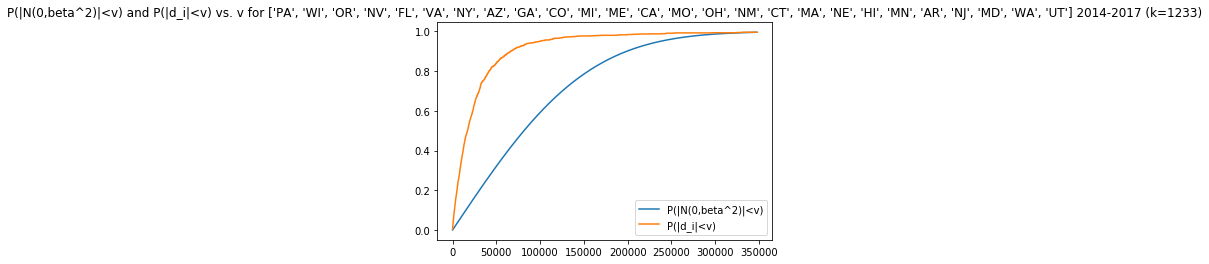

In [18]:
theoretical = [special.erf(vi/(max_beta*np.sqrt(2))) for vi in v]

plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v)")
plt.plot(v, ratios2, label="P(|d_i|<v)")
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s 2014-2017 (k=%d)" % (states, len(df2)))
#plt.axvline(x=64432.69, color='r', linestyle='--', label="Point of max difference")
plt.legend()
print("beta = %.3f" % (max_beta))

In [19]:
beta_theoretical, Mb_index = run_test_against_theoretical(df2, max_beta, ratios2, False)

k = 1233
test_stat at this k = 0.03472

At the point of maximum difference with beta = 120900:
P(|d_i|<v) = 0.8191
P(|N(0,max_beta^2)|<v) = 0.2871
Difference = 0.5321




At the point of maximum difference with beta = 110900:
P(|d_i|<v) = 0.8013
P(|N(0,max_beta^2)|<v) = 0.2927
Difference = 0.5085




At the point of maximum difference with beta = 100900:
P(|d_i|<v) = 0.7397
P(|N(0,max_beta^2)|<v) = 0.2549
Difference = 0.4848




At the point of maximum difference with beta = 90900:
P(|d_i|<v) = 0.7397
P(|N(0,max_beta^2)|<v) = 0.2818
Difference = 0.4579




At the point of maximum difference with beta = 80900:
P(|d_i|<v) = 0.7397
P(|N(0,max_beta^2)|<v) = 0.3148
Difference = 0.4248




At the point of maximum difference with beta = 70900:
P(|d_i|<v) = 0.7397
P(|N(0,max_beta^2)|<v) = 0.3563
Difference = 0.3833




At the point of maximum difference with beta = 60900:
P(|d_i|<v) = 0.7397
P(|N(0,max_beta^2)|<v) = 0.4098
Difference = 0.3299




At the point of maximum difference with beta = 


At the point of maximum difference with beta = 25300:
P(|d_i|<v) = 0.2198
P(|N(0,max_beta^2)|<v) = 0.1737
Difference = 0.0461




At the point of maximum difference with beta = 25200:
P(|d_i|<v) = 0.2198
P(|N(0,max_beta^2)|<v) = 0.1744
Difference = 0.0454




At the point of maximum difference with beta = 25100:
P(|d_i|<v) = 0.2198
P(|N(0,max_beta^2)|<v) = 0.1751
Difference = 0.0447




At the point of maximum difference with beta = 25000:
P(|d_i|<v) = 0.2198
P(|N(0,max_beta^2)|<v) = 0.1758
Difference = 0.0440




At the point of maximum difference with beta = 24900:
P(|d_i|<v) = 0.2198
P(|N(0,max_beta^2)|<v) = 0.1765
Difference = 0.0433




At the point of maximum difference with beta = 24800:
P(|d_i|<v) = 0.2198
P(|N(0,max_beta^2)|<v) = 0.1772
Difference = 0.0426




At the point of maximum difference with beta = 24700:
P(|d_i|<v) = 0.2198
P(|N(0,max_beta^2)|<v) = 0.1779
Difference = 0.0419




At the point of maximum difference with beta = 24600:
P(|d_i|<v) = 0.2198
P(|N(0,max_beta

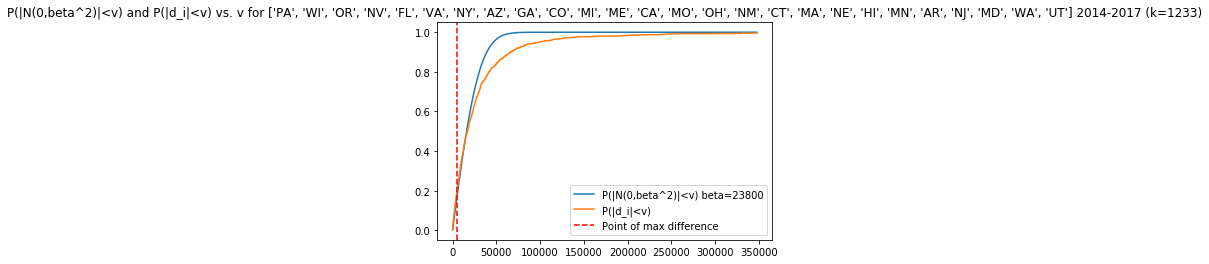

In [20]:
beta_theoretical = beta_theoretical+100

theoretical = [special.erf(vi/(beta_theoretical*np.sqrt(2))) for vi in v]

plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v) beta=%d" % (beta_theoretical))
plt.plot(v, ratios2, label="P(|d_i|<v)")
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s 2014-2017 (k=%d)" % (states, len(df2)))
plt.axvline(x=v[Mb_index], color='r', linestyle='--', label="Point of max difference")
plt.legend()
#plt.xlim(0, 50000)
#print("beta = %.3f" % (max_beta))

In [21]:
print("Theoretical Test Results")
run_binom_stat_test2(beta_theoretical, df2.values)

Theoretical Test Results
Beta (=std): 23800
Number of T/sqrt(n) above 2 stds: 212
Proportion of T/sqrt(n) above 2 stds: 0.172
P value = 0.000000


In [22]:
ratios_c, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta_theoretical - 10000)
ratios_c2, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta_theoretical)
ratios_c3, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta_theoretical + 10000)

Sum sqrt(a) = 147470.821
Sum sqrt(a) = 147470.821
Sum sqrt(a) = 147470.821


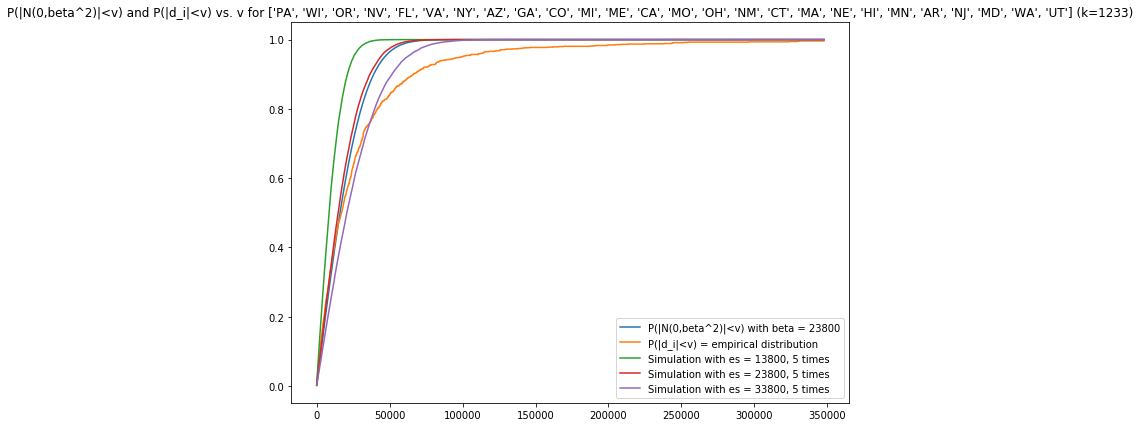

In [23]:
theoretical = [special.erf(vi/(beta_theoretical*np.sqrt(2))) for vi in v]

plt.figure(figsize=(10, 7))
plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v) with beta = %d" % (beta_theoretical))
plt.plot(v, ratios2, label="P(|d_i|<v) = empirical distribution")
plt.plot(v, ratios_c, label="Simulation with es = %d, 5 times" % (beta_theoretical - 10000))
plt.plot(v, ratios_c2, label="Simulation with es = %d, 5 times" % (beta_theoretical))
plt.plot(v, ratios_c3, label="Simulation with es = %d, 5 times" % (beta_theoretical + 10000))
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s (k=%d)" % (states, len(df2)))
plt.legend()

In [24]:
beta_sims = list()

for i in range(5):
    beta_sim, _= run_test_against_simulation(states, dfs_new, beta_theoretical, ratios2, False)
    beta_sims.append(beta_sim)

k = 1233
test_stat at this k = 0.03472

At the point of maximum difference with beta = 33800:
P(|d_i|<v) = 0.4517
P(|N(0,max_beta^2)|<v) = 0.3386
Difference = 0.1131




At the point of maximum difference with beta = 33700:
P(|d_i|<v) = 0.4558
P(|N(0,max_beta^2)|<v) = 0.3437
Difference = 0.1121




At the point of maximum difference with beta = 33600:
P(|d_i|<v) = 0.4250
P(|N(0,max_beta^2)|<v) = 0.3171
Difference = 0.1079




At the point of maximum difference with beta = 33500:
P(|d_i|<v) = 0.4396
P(|N(0,max_beta^2)|<v) = 0.3230
Difference = 0.1166




At the point of maximum difference with beta = 33400:
P(|d_i|<v) = 0.4558
P(|N(0,max_beta^2)|<v) = 0.3431
Difference = 0.1127




At the point of maximum difference with beta = 33300:
P(|d_i|<v) = 0.4558
P(|N(0,max_beta^2)|<v) = 0.3492
Difference = 0.1066




At the point of maximum difference with beta = 33200:
P(|d_i|<v) = 0.4558
P(|N(0,max_beta^2)|<v) = 0.3442
Difference = 0.1116




At the point of maximum difference with beta = 331


At the point of maximum difference with beta = 27500:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2822
Difference = 0.0511




At the point of maximum difference with beta = 27400:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2767
Difference = 0.0567




At the point of maximum difference with beta = 27300:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2767
Difference = 0.0566




At the point of maximum difference with beta = 27200:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2810
Difference = 0.0523




At the point of maximum difference with beta = 27100:
P(|d_i|<v) = 0.2514
P(|N(0,max_beta^2)|<v) = 0.2023
Difference = 0.0491




At the point of maximum difference with beta = 27000:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2823
Difference = 0.0510




At the point of maximum difference with beta = 26900:
P(|d_i|<v) = 0.2514
P(|N(0,max_beta^2)|<v) = 0.2011
Difference = 0.0503




At the point of maximum difference with beta = 26800:
P(|d_i|<v) = 0.2514
P(|N(0,max_beta


At the point of maximum difference with beta = 29000:
P(|d_i|<v) = 0.3828
P(|N(0,max_beta^2)|<v) = 0.3138
Difference = 0.0690




At the point of maximum difference with beta = 28900:
P(|d_i|<v) = 0.4250
P(|N(0,max_beta^2)|<v) = 0.3551
Difference = 0.0699




At the point of maximum difference with beta = 28800:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2649
Difference = 0.0685




At the point of maximum difference with beta = 28700:
P(|d_i|<v) = 0.3779
P(|N(0,max_beta^2)|<v) = 0.3137
Difference = 0.0642




At the point of maximum difference with beta = 28600:
P(|d_i|<v) = 0.4250
P(|N(0,max_beta^2)|<v) = 0.3541
Difference = 0.0709




At the point of maximum difference with beta = 28500:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2705
Difference = 0.0628




At the point of maximum difference with beta = 28400:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2722
Difference = 0.0612




At the point of maximum difference with beta = 28300:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta


At the point of maximum difference with beta = 31500:
P(|d_i|<v) = 0.4250
P(|N(0,max_beta^2)|<v) = 0.3285
Difference = 0.0965




At the point of maximum difference with beta = 31400:
P(|d_i|<v) = 0.4250
P(|N(0,max_beta^2)|<v) = 0.3382
Difference = 0.0868




At the point of maximum difference with beta = 31300:
P(|d_i|<v) = 0.3593
P(|N(0,max_beta^2)|<v) = 0.2719
Difference = 0.0874




At the point of maximum difference with beta = 31200:
P(|d_i|<v) = 0.4517
P(|N(0,max_beta^2)|<v) = 0.3595
Difference = 0.0922




At the point of maximum difference with beta = 31100:
P(|d_i|<v) = 0.4250
P(|N(0,max_beta^2)|<v) = 0.3374
Difference = 0.0875




At the point of maximum difference with beta = 31000:
P(|d_i|<v) = 0.3747
P(|N(0,max_beta^2)|<v) = 0.2883
Difference = 0.0864




At the point of maximum difference with beta = 30900:
P(|d_i|<v) = 0.3828
P(|N(0,max_beta^2)|<v) = 0.2955
Difference = 0.0873




At the point of maximum difference with beta = 30800:
P(|d_i|<v) = 0.3609
P(|N(0,max_beta


At the point of maximum difference with beta = 33800:
P(|d_i|<v) = 0.4558
P(|N(0,max_beta^2)|<v) = 0.3469
Difference = 0.1089




At the point of maximum difference with beta = 33700:
P(|d_i|<v) = 0.4396
P(|N(0,max_beta^2)|<v) = 0.3293
Difference = 0.1102




At the point of maximum difference with beta = 33600:
P(|d_i|<v) = 0.4517
P(|N(0,max_beta^2)|<v) = 0.3441
Difference = 0.1076




At the point of maximum difference with beta = 33500:
P(|d_i|<v) = 0.4517
P(|N(0,max_beta^2)|<v) = 0.3329
Difference = 0.1188




At the point of maximum difference with beta = 33400:
P(|d_i|<v) = 0.4558
P(|N(0,max_beta^2)|<v) = 0.3492
Difference = 0.1066




At the point of maximum difference with beta = 33300:
P(|d_i|<v) = 0.4517
P(|N(0,max_beta^2)|<v) = 0.3432
Difference = 0.1085




At the point of maximum difference with beta = 33200:
P(|d_i|<v) = 0.4558
P(|N(0,max_beta^2)|<v) = 0.3466
Difference = 0.1092




At the point of maximum difference with beta = 33100:
P(|d_i|<v) = 0.4396
P(|N(0,max_beta


At the point of maximum difference with beta = 27400:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2787
Difference = 0.0546




At the point of maximum difference with beta = 27300:
P(|d_i|<v) = 0.2198
P(|N(0,max_beta^2)|<v) = 0.1664
Difference = 0.0534




At the point of maximum difference with beta = 27200:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2797
Difference = 0.0536




At the point of maximum difference with beta = 27100:
P(|d_i|<v) = 0.2198
P(|N(0,max_beta^2)|<v) = 0.1680
Difference = 0.0518




At the point of maximum difference with beta = 27000:
P(|d_i|<v) = 0.2214
P(|N(0,max_beta^2)|<v) = 0.1707
Difference = 0.0507




At the point of maximum difference with beta = 26900:
P(|d_i|<v) = 0.2498
P(|N(0,max_beta^2)|<v) = 0.1977
Difference = 0.0521




At the point of maximum difference with beta = 26800:
P(|d_i|<v) = 0.2214
P(|N(0,max_beta^2)|<v) = 0.1754
Difference = 0.0460




At the point of maximum difference with beta = 26700:
P(|d_i|<v) = 0.2198
P(|N(0,max_beta


At the point of maximum difference with beta = 29800:
P(|d_i|<v) = 0.4250
P(|N(0,max_beta^2)|<v) = 0.3502
Difference = 0.0748




At the point of maximum difference with beta = 29700:
P(|d_i|<v) = 0.4250
P(|N(0,max_beta^2)|<v) = 0.3465
Difference = 0.0785




At the point of maximum difference with beta = 29600:
P(|d_i|<v) = 0.3593
P(|N(0,max_beta^2)|<v) = 0.2855
Difference = 0.0737




At the point of maximum difference with beta = 29500:
P(|d_i|<v) = 0.3747
P(|N(0,max_beta^2)|<v) = 0.3047
Difference = 0.0700




At the point of maximum difference with beta = 29400:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2662
Difference = 0.0671




At the point of maximum difference with beta = 29300:
P(|d_i|<v) = 0.3828
P(|N(0,max_beta^2)|<v) = 0.3111
Difference = 0.0717




At the point of maximum difference with beta = 29200:
P(|d_i|<v) = 0.3828
P(|N(0,max_beta^2)|<v) = 0.3080
Difference = 0.0748




At the point of maximum difference with beta = 29100:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta

In [25]:
print("Simulation without Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sims), df2.values)
run_binom_stat_test3(np.mean(beta_sims), df2.values)

Simulation without Adjustment Test Results
Beta (=std): 25360
Number of T/sqrt(n) above 2 stds: 190
Proportion of T/sqrt(n) above 2 stds: 0.154
P value = 0.000000
Beta (=std): 25360
Number of T/sqrt(n) above 3 stds: 97
Proportion of T/sqrt(n) above 3 stds: 0.079
P value = 0.000000


In [26]:
beta_sim_adjs = list()

for i in range(5):
    beta_sim_adj, _= run_test_against_simulation_adjust_for_imbalances(states, dfs_new,
                                                                   beta_theoretical, ratios2, False)
    beta_sim_adjs.append(beta_sim_adj)

k = 1233
test_stat at this k = 0.03472
Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 38800:
P(|d_i|<v) = 0.4558
P(|N(0,max_beta^2)|<v) = 0.3109
Difference = 0.1448



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 38700:
P(|d_i|<v) = 0.4558
P(|N(0,max_beta^2)|<v) = 0.3090
Difference = 0.1468



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 38600:
P(|d_i|<v) = 0.4517
P(|N(0,max_beta^2)|<v) = 0.3124
Difference = 0.1394



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 38500:
P(|d_i|<v) = 0.4663
P(|N(0,max_beta^2)|<v) = 0.3245
Difference = 0.1418



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 38400:
P(|d_i|<v) = 0.4663
P(|N(0,max_beta^2)|<v) = 0.3281
Difference = 0.1383



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 38300:
P(|d_i|<v) = 0.4558
P(|N(0,max_beta^2)|<v) = 0.3122
Difference = 0.1436



Sum sqrt(a) = 147470.821

At th

Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 33500:
P(|d_i|<v) = 0.4250
P(|N(0,max_beta^2)|<v) = 0.3271
Difference = 0.0979



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 33400:
P(|d_i|<v) = 0.4250
P(|N(0,max_beta^2)|<v) = 0.3241
Difference = 0.1009



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 33300:
P(|d_i|<v) = 0.4250
P(|N(0,max_beta^2)|<v) = 0.3338
Difference = 0.0912



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 33200:
P(|d_i|<v) = 0.4250
P(|N(0,max_beta^2)|<v) = 0.3320
Difference = 0.0930



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 33100:
P(|d_i|<v) = 0.4250
P(|N(0,max_beta^2)|<v) = 0.3353
Difference = 0.0896



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 33000:
P(|d_i|<v) = 0.4250
P(|N(0,max_beta^2)|<v) = 0.3373
Difference = 0.0876



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta

Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 28200:
P(|d_i|<v) = 0.2425
P(|N(0,max_beta^2)|<v) = 0.1948
Difference = 0.0477



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 28100:
P(|d_i|<v) = 0.2425
P(|N(0,max_beta^2)|<v) = 0.1929
Difference = 0.0496



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 28000:
P(|d_i|<v) = 0.3293
P(|N(0,max_beta^2)|<v) = 0.2828
Difference = 0.0464



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 27900:
P(|d_i|<v) = 0.2198
P(|N(0,max_beta^2)|<v) = 0.1749
Difference = 0.0449



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 27800:
P(|d_i|<v) = 0.2198
P(|N(0,max_beta^2)|<v) = 0.1750
Difference = 0.0448



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 27700:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2902
Difference = 0.0431



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta

Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 35600:
P(|d_i|<v) = 0.4250
P(|N(0,max_beta^2)|<v) = 0.2987
Difference = 0.1263



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 35500:
P(|d_i|<v) = 0.4250
P(|N(0,max_beta^2)|<v) = 0.3090
Difference = 0.1160



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 35400:
P(|d_i|<v) = 0.4558
P(|N(0,max_beta^2)|<v) = 0.3406
Difference = 0.1152



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 35300:
P(|d_i|<v) = 0.4558
P(|N(0,max_beta^2)|<v) = 0.3390
Difference = 0.1168



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 35200:
P(|d_i|<v) = 0.4396
P(|N(0,max_beta^2)|<v) = 0.3209
Difference = 0.1187



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 35100:
P(|d_i|<v) = 0.4517
P(|N(0,max_beta^2)|<v) = 0.3321
Difference = 0.1196



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta

Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 30300:
P(|d_i|<v) = 0.3593
P(|N(0,max_beta^2)|<v) = 0.2858
Difference = 0.0735



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 30200:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2588
Difference = 0.0746



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 30100:
P(|d_i|<v) = 0.3593
P(|N(0,max_beta^2)|<v) = 0.2898
Difference = 0.0695



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 30000:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2646
Difference = 0.0688



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 29900:
P(|d_i|<v) = 0.4250
P(|N(0,max_beta^2)|<v) = 0.3659
Difference = 0.0591



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 29800:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2763
Difference = 0.0570



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta

Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 37200:
P(|d_i|<v) = 0.4558
P(|N(0,max_beta^2)|<v) = 0.3287
Difference = 0.1271



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 37100:
P(|d_i|<v) = 0.4663
P(|N(0,max_beta^2)|<v) = 0.3367
Difference = 0.1296



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 37000:
P(|d_i|<v) = 0.4663
P(|N(0,max_beta^2)|<v) = 0.3415
Difference = 0.1248



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 36900:
P(|d_i|<v) = 0.4558
P(|N(0,max_beta^2)|<v) = 0.3220
Difference = 0.1338



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 36800:
P(|d_i|<v) = 0.4696
P(|N(0,max_beta^2)|<v) = 0.3466
Difference = 0.1230



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 36700:
P(|d_i|<v) = 0.4696
P(|N(0,max_beta^2)|<v) = 0.3432
Difference = 0.1264



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta

Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 31900:
P(|d_i|<v) = 0.3812
P(|N(0,max_beta^2)|<v) = 0.3014
Difference = 0.0798



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 31800:
P(|d_i|<v) = 0.3828
P(|N(0,max_beta^2)|<v) = 0.3061
Difference = 0.0767



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 31700:
P(|d_i|<v) = 0.3828
P(|N(0,max_beta^2)|<v) = 0.3019
Difference = 0.0809



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 31600:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2556
Difference = 0.0778



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 31500:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2562
Difference = 0.0771



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 31400:
P(|d_i|<v) = 0.3609
P(|N(0,max_beta^2)|<v) = 0.2868
Difference = 0.0741



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta

Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 26600:
P(|d_i|<v) = 0.2198
P(|N(0,max_beta^2)|<v) = 0.1873
Difference = 0.0325 NOT > test_stat
E(|X|) = 3129880792.089
k = 1233
test_stat at this k = 0.03472
Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 38800:
P(|d_i|<v) = 0.4663
P(|N(0,max_beta^2)|<v) = 0.3289
Difference = 0.1374



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 38700:
P(|d_i|<v) = 0.4696
P(|N(0,max_beta^2)|<v) = 0.3269
Difference = 0.1427



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 38600:
P(|d_i|<v) = 0.4517
P(|N(0,max_beta^2)|<v) = 0.3153
Difference = 0.1365



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 38500:
P(|d_i|<v) = 0.4558
P(|N(0,max_beta^2)|<v) = 0.3168
Difference = 0.1390



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 38400:
P(|d_i|<v) = 0.4558
P(|N(0,max_beta^2)|<v) = 0.3211
Difference = 0.13

Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 33600:
P(|d_i|<v) = 0.4663
P(|N(0,max_beta^2)|<v) = 0.3730
Difference = 0.0933



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 33500:
P(|d_i|<v) = 0.4558
P(|N(0,max_beta^2)|<v) = 0.3654
Difference = 0.0904



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 33400:
P(|d_i|<v) = 0.3812
P(|N(0,max_beta^2)|<v) = 0.2896
Difference = 0.0916



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 33300:
P(|d_i|<v) = 0.4250
P(|N(0,max_beta^2)|<v) = 0.3369
Difference = 0.0881



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 33200:
P(|d_i|<v) = 0.4250
P(|N(0,max_beta^2)|<v) = 0.3344
Difference = 0.0906



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 33100:
P(|d_i|<v) = 0.4396
P(|N(0,max_beta^2)|<v) = 0.3464
Difference = 0.0932



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta

Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 28300:
P(|d_i|<v) = 0.2514
P(|N(0,max_beta^2)|<v) = 0.1960
Difference = 0.0554



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 28200:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2871
Difference = 0.0462



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 28100:
P(|d_i|<v) = 0.2498
P(|N(0,max_beta^2)|<v) = 0.1982
Difference = 0.0516



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 28000:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2829
Difference = 0.0504



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 27900:
P(|d_i|<v) = 0.2498
P(|N(0,max_beta^2)|<v) = 0.2042
Difference = 0.0456



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 27800:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2838
Difference = 0.0496



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta

Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 35600:
P(|d_i|<v) = 0.4558
P(|N(0,max_beta^2)|<v) = 0.3399
Difference = 0.1159



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 35500:
P(|d_i|<v) = 0.4396
P(|N(0,max_beta^2)|<v) = 0.3261
Difference = 0.1134



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 35400:
P(|d_i|<v) = 0.4517
P(|N(0,max_beta^2)|<v) = 0.3351
Difference = 0.1167



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 35300:
P(|d_i|<v) = 0.4485
P(|N(0,max_beta^2)|<v) = 0.3328
Difference = 0.1157



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 35200:
P(|d_i|<v) = 0.4250
P(|N(0,max_beta^2)|<v) = 0.3080
Difference = 0.1170



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 35100:
P(|d_i|<v) = 0.4501
P(|N(0,max_beta^2)|<v) = 0.3407
Difference = 0.1094



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta

Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 30300:
P(|d_i|<v) = 0.3593
P(|N(0,max_beta^2)|<v) = 0.2924
Difference = 0.0669



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 30200:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2634
Difference = 0.0700



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 30100:
P(|d_i|<v) = 0.3828
P(|N(0,max_beta^2)|<v) = 0.3113
Difference = 0.0715



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 30000:
P(|d_i|<v) = 0.3577
P(|N(0,max_beta^2)|<v) = 0.2940
Difference = 0.0636



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 29900:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2695
Difference = 0.0638



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 29800:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2675
Difference = 0.0659



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta

In [27]:
print("Simulation WITH Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sim_adjs), df2.values)
run_binom_stat_test3(np.mean(beta_sim_adjs), df2.values)

Simulation WITH Adjustment Test Results
Beta (=std): 26420
Number of T/sqrt(n) above 2 stds: 181
Proportion of T/sqrt(n) above 2 stds: 0.147
P value = 0.000000
Beta (=std): 26420
Number of T/sqrt(n) above 3 stds: 89
Proportion of T/sqrt(n) above 3 stds: 0.072
P value = 0.000000


In [28]:
print("Theoretical Test Results")
run_binom_stat_test2(beta_theoretical, df2.values)
run_binom_stat_test3(beta_theoretical, df2.values)
print("\n")
print("Simulation without Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sims), df2.values)
run_binom_stat_test3(np.mean(beta_sims), df2.values)
print("\n")
print("Simulation WITH Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sim_adjs), df2.values)
run_binom_stat_test3(np.mean(beta_sim_adjs), df2.values)

Theoretical Test Results
Beta (=std): 23800
Number of T/sqrt(n) above 2 stds: 212
Proportion of T/sqrt(n) above 2 stds: 0.172
P value = 0.000000
Beta (=std): 23800
Number of T/sqrt(n) above 3 stds: 107
Proportion of T/sqrt(n) above 3 stds: 0.087
P value = 0.000000


Simulation without Adjustment Test Results
Beta (=std): 25360
Number of T/sqrt(n) above 2 stds: 190
Proportion of T/sqrt(n) above 2 stds: 0.154
P value = 0.000000
Beta (=std): 25360
Number of T/sqrt(n) above 3 stds: 97
Proportion of T/sqrt(n) above 3 stds: 0.079
P value = 0.000000


Simulation WITH Adjustment Test Results
Beta (=std): 26420
Number of T/sqrt(n) above 2 stds: 181
Proportion of T/sqrt(n) above 2 stds: 0.147
P value = 0.000000
Beta (=std): 26420
Number of T/sqrt(n) above 3 stds: 89
Proportion of T/sqrt(n) above 3 stds: 0.072
P value = 0.000000
